# Exercise - IMDB

1. Use the IMDB movie review data (positive/negative movie reviews) to build a model that is able to predict the sentiment (positive/negative) from movie reviews. Your initial model should use one embedding layer, one recurrent layer (up to you which type), and a final fully connected layer to perform the classification.
1. Try to improve your model by doing (at least) the following: add an additional recurrent layer and/or use a bidirectional recurrent layer (**note**: If you have a good 1-layer model this may be difficult - just try your best).
1. In the preprocessing of the data made by me, I kepts the top 1000 words and let all reviews be 100 words long. Consider changing one/both of these to try to improve your best model (**hint**: the limit of only 100 words is very severe - try doubling it to 200, this may likely improve your performance).

**Note**: You may want to use:
1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU
1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional
1. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

**See slides for more details!**

# Setup

In [1]:
NB_WORDS_KEEP = 1000 # keep top 1000 words (most occuring) -> all else cast to "unknown"
SENTENCE_LEN = 100 # ensure sentences are exactly 100 words long. If longer, truncate. If shorter, pad

In [2]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

17464789/17464789 [==============================] - 2s 0us/step
(25000,) (25000,) (25000,) (25000,)


In [3]:
print(f'First sentence has length = {len(x_train[0])}')
print(f'Second sentence has length = {len(x_train[1])}')

First sentence has length = 218
Second sentence has length = 189


Above data is difficult to work with. Too many unique words and not uniform review length. Let's change that.

In [10]:
start_char=1
oov_char=2
index_from=3
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    num_words=NB_WORDS_KEEP, # only keep 1000 most used words
    start_char=start_char, # use 1 to indicate start of sentence
    oov_char=oov_char, # use 2 to indicate any word not in the top 1000
    index_from=index_from # start indexing words from 3
)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [11]:
print(f'First sentence = {x_train[0]}')
print(f'Second sentence = {x_train[1]}')

First sentence = [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Second sentence = [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 

In [16]:
word_index = tf.keras.datasets.imdb.get_word_index()
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
print(f'First sentence decoded = \n{decoded_sequence}')

First sentence decoded = 
[START] this film was just brilliant casting [OOV] [OOV] story direction [OOV] really [OOV] the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same [OOV] [OOV] as myself so i loved the fact there was a real [OOV] with this film the [OOV] [OOV] throughout the film were great it was just brilliant so much that i [OOV] the film as soon as it was released for [OOV] and would recommend it to everyone to watch and the [OOV] [OOV] was amazing really [OOV] at the end it was so sad and you know what they say if you [OOV] at a film it must have been good and this definitely was also [OOV] to the two little [OOV] that played the [OOV] of [OOV] and paul they were just brilliant children are often left out of the [OOV] [OOV] i think because the stars that play them all [OOV] up are such a big [OOV] for the whole film but these children are amazing and should be [OOV] for wh

In [17]:
def preprocess_sample(sample, target_len):
    if len(sample) > target_len:
        return sample[:target_len] # if too long, shorten
    if len(sample) < target_len: # if too short, pad
        return sample + [0] * (target_len - len(sample)) # zero for these cases, i.e. padding
    return sample

def preprocess_imdb(x, target_len):
    mod_x = []
    
    for sample in x:
        mod_x.append(preprocess_sample(sample, target_len))
        
    return np.array(mod_x)

In [18]:
# NOTE: Use these modified sentences as the data for training and testing!
z_train = preprocess_imdb(x_train, SENTENCE_LEN)
z_test = preprocess_imdb(x_test, SENTENCE_LEN)

In [19]:
print(f'First sentence has length = {len(x_train[0])}')
print(f'Second sentence has length = {len(x_train[1])}')

print(f'First modified sentence has length = {len(z_train[0])}')
print(f'Second modified sentence has length = {len(z_train[1])}')

First sentence has length = 218
Second sentence has length = 189
First modified sentence has length = 100
Second modified sentence has length = 100


# Exercise 1

Use the IMDB movie review data (positive/negative movie reviews) to build a model that is able to predict the sentiment (positive/negative) from movie reviews. Your initial model should use one embedding layer, one recurrent layer (up to you which type), and a final fully connected layer to perform the classification.

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=NB_WORDS_KEEP, output_dim=64), # 64D embedding space
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(2, activation='softmax'), # could also use 1 node with sigmoid
])

model.summary()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam', # perhaps try rmsprop as well
    metrics=['accuracy'],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 163,074
Trainable params: 163,074
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist_ex1 = model.fit(z_train, y_train, validation_data=(z_test, y_test), epochs = 10) # remember to use z!

Epoch 1/10
782/782 [==============================] - 49s 61ms/step - loss: 0.5640 - accuracy: 0.6930 - val_loss: 0.4718 - val_accuracy: 0.7765
Epoch 2/10
782/782 [==============================] - 49s 63ms/step - loss: 0.4535 - accuracy: 0.7923 - val_loss: 0.5076 - val_accuracy: 0.7819
Epoch 3/10
782/782 [==============================] - 51s 66ms/step - loss: 0.4229 - accuracy: 0.8080 - val_loss: 0.4330 - val_accuracy: 0.7984
Epoch 4/10
782/782 [==============================] - 51s 65ms/step - loss: 0.4001 - accuracy: 0.8199 - val_loss: 0.4884 - val_accuracy: 0.7940
Epoch 5/10
782/782 [==============================] - 53s 67ms/step - loss: 0.3813 - accuracy: 0.8295 - val_loss: 0.4501 - val_accuracy: 0.7758
Epoch 6/10
782/782 [==============================] - 58s 74ms/step - loss: 0.3638 - accuracy: 0.8379 - val_loss: 0.4412 - val_accuracy: 0.7881
Epoch 7/10
782/782 [==============================] - 60s 77ms/step - loss: 0.3459 - accuracy: 0.8469 - val_loss: 0.4609 - val_accuracy:

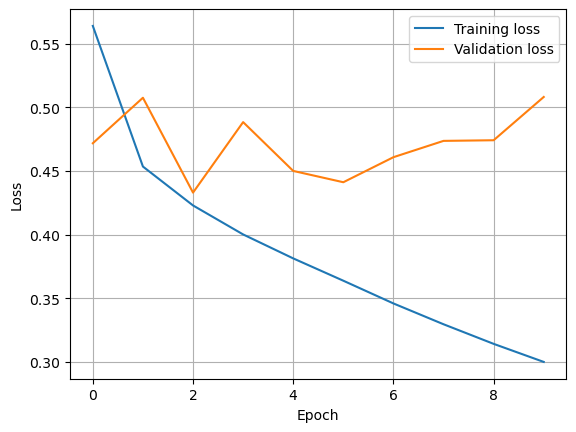

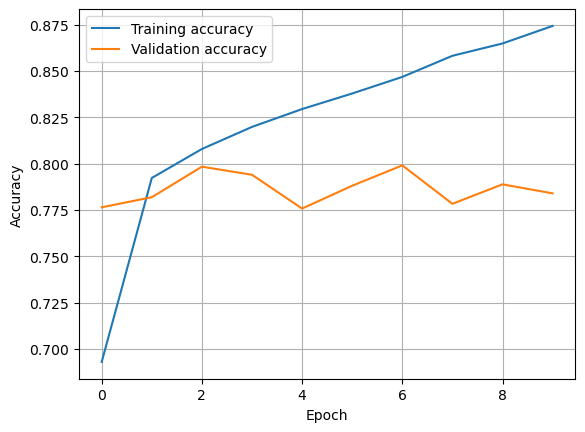

In [22]:
from matplotlib import pyplot as plt

plt.plot(hist_ex1.history['loss'], label='Training loss')
plt.plot(hist_ex1.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(hist_ex1.history['accuracy'], label='Training accuracy')
plt.plot(hist_ex1.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Exercise 2

Try to improve your model by doing (at least) the following: add an additional recurrent layer and/or use a bidirectional recurrent layer (**note**: If you have a good 1-layer model this may be difficult - just try your best).

In [23]:
model_deep = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=NB_WORDS_KEEP, output_dim=64),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(2, activation='softmax'),
])

model_deep.summary()

model_deep.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 212,354
Trainable params: 212,354
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist_ex2_deep = model_deep.fit(z_train, y_train, validation_data=(z_test, y_test), epochs = 10) # remember to use z!

Epoch 1/10


782/782 [==============================] - 72s 89ms/step - loss: 0.5991 - accuracy: 0.6687 - val_loss: 0.4841 - val_accuracy: 0.7743
Epoch 2/10
782/782 [==============================] - 70s 89ms/step - loss: 0.4667 - accuracy: 0.7843 - val_loss: 0.4511 - val_accuracy: 0.7848
Epoch 3/10
782/782 [==============================] - 71s 91ms/step - loss: 0.4327 - accuracy: 0.8018 - val_loss: 0.4333 - val_accuracy: 0.7978
Epoch 4/10
782/782 [==============================] - 72s 92ms/step - loss: 0.4155 - accuracy: 0.8105 - val_loss: 0.4434 - val_accuracy: 0.7997
Epoch 5/10
782/782 [==============================] - 74s 95ms/step - loss: 0.4003 - accuracy: 0.8179 - val_loss: 0.4325 - val_accuracy: 0.7976
Epoch 6/10
782/782 [==============================] - 73s 94ms/step - loss: 0.3810 - accuracy: 0.8295 - val_loss: 0.4407 - val_accuracy: 0.8023
Epoch 7/10
782/782 [==============================] - 74s 94ms/step - loss: 0.3682 - accuracy: 0.8374 - val_loss: 0.4446 - val_accuracy: 0.7884
Epo

In [25]:
model_bidirectional = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=NB_WORDS_KEEP, output_dim=64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(2, activation='softmax'),
])

model_bidirectional.summary()

model_bidirectional.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam', 
    metrics=['accuracy'],
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 262,146
Trainable params: 262,146
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist_ex2_bidirectional = model_bidirectional.fit(z_train, y_train, validation_data=(z_test, y_test), epochs = 10) # remember to use z!

Epoch 1/10
782/782 [==============================] - 80s 100ms/step - loss: 0.5265 - accuracy: 0.7315 - val_loss: 0.4542 - val_accuracy: 0.7847
Epoch 2/10
782/782 [==============================] - 85s 109ms/step - loss: 0.4345 - accuracy: 0.7994 - val_loss: 0.4258 - val_accuracy: 0.8001
Epoch 3/10
782/782 [==============================] - 84s 108ms/step - loss: 0.4115 - accuracy: 0.8111 - val_loss: 0.4411 - val_accuracy: 0.7946
Epoch 4/10
782/782 [==============================] - 81s 104ms/step - loss: 0.3905 - accuracy: 0.8225 - val_loss: 0.4473 - val_accuracy: 0.7949
Epoch 5/10
782/782 [==============================] - 82s 105ms/step - loss: 0.3691 - accuracy: 0.8338 - val_loss: 0.4356 - val_accuracy: 0.7955
Epoch 6/10
782/782 [==============================] - 82s 104ms/step - loss: 0.3452 - accuracy: 0.8484 - val_loss: 0.4493 - val_accuracy: 0.7883
Epoch 7/10
782/782 [==============================] - 88s 112ms/step - loss: 0.3227 - accuracy: 0.8590 - val_loss: 0.4617 - val_ac

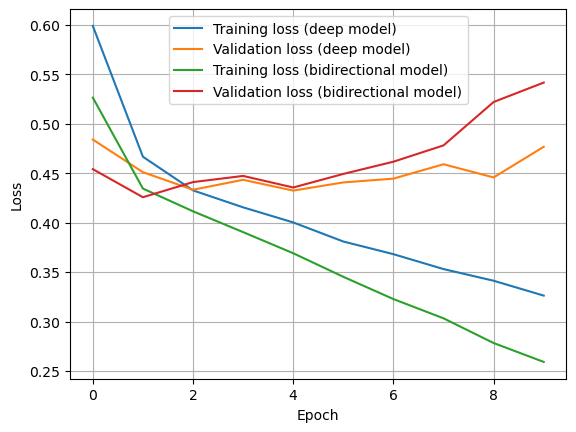

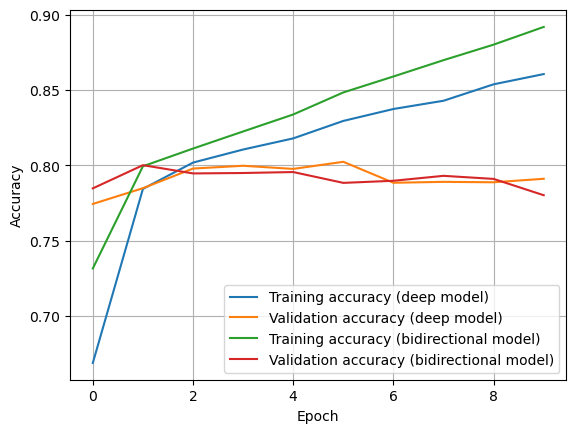

In [27]:
plt.plot(hist_ex2_deep.history['loss'], label='Training loss (deep model)')
plt.plot(hist_ex2_deep.history['val_loss'], label='Validation loss (deep model)')
plt.plot(hist_ex2_bidirectional.history['loss'], label='Training loss (bidirectional model)')
plt.plot(hist_ex2_bidirectional.history['val_loss'], label='Validation loss (bidirectional model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(hist_ex2_deep.history['accuracy'], label='Training accuracy (deep model)')
plt.plot(hist_ex2_deep.history['val_accuracy'], label='Validation accuracy (deep model)')
plt.plot(hist_ex2_bidirectional.history['accuracy'], label='Training accuracy (bidirectional model)')
plt.plot(hist_ex2_bidirectional.history['val_accuracy'], label='Validation accuracy (bidirectional model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Exercise 3

In the preprocessing of the data made by me, I kepts the top 1000 words and let all reviews be 100 words long. Consider changing one/both of these to try to improve your best model (**hint**: the limit of only 100 words is very severe - try doubling it to 200, this may likely improve your performance).

**Comment**: In this simple example, I just extend the sentence length to the first 200 words - which proves to be very beneficial.

However, training is now much more difficult. It takes longer (despite using an identical model to the one in **Exercise 1**) and it takes more epochs before any real progress is made. This is a pattern you will often encounter when working with recurrent models and increasing the sequence length.

In [25]:
SENTENCE_LEN = 200

# NOTE: Use these modified sentences as the data for training and testing!
z_train = preprocess_imdb(x_train, SENTENCE_LEN)
z_test = preprocess_imdb(x_test, SENTENCE_LEN)

In [26]:
model_ex3 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=NB_WORDS_KEEP, output_dim=64), # 64D embedding space
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(2, activation='softmax'), # could also use 1 node with sigmoid
])

model_ex3.summary()

model_ex3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam', # perhaps try rmsprop as well
    metrics=['accuracy'],
)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 163,074
Trainable params: 163,074
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist_ex3 = model_ex3.fit(z_train, y_train, validation_data=(z_test, y_test), epochs = 10)

Epoch 1/10
782/782 [==============================] - 18s 23ms/step - loss: 0.6778 - accuracy: 0.5688 - val_loss: 0.6609 - val_accuracy: 0.6107
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.6639 - accuracy: 0.5976 - val_loss: 0.6187 - val_accuracy: 0.6961
Epoch 3/10
782/782 [==============================] - 19s 24ms/step - loss: 0.6318 - accuracy: 0.6476 - val_loss: 0.6702 - val_accuracy: 0.5585
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.6584 - accuracy: 0.5953 - val_loss: 0.6782 - val_accuracy: 0.5519
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.4408 - accuracy: 0.7970 - val_loss: 0.3779 - val_accuracy: 0.8335
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3488 - accuracy: 0.8516 - val_loss: 0.3654 - val_accuracy: 0.8384
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3262 - accuracy: 0.8635 - val_loss: 0.3631 - val_accuracy:

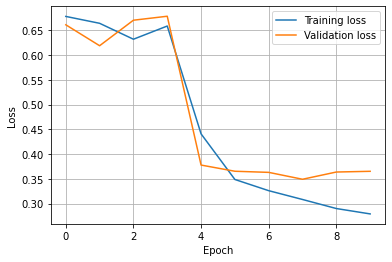

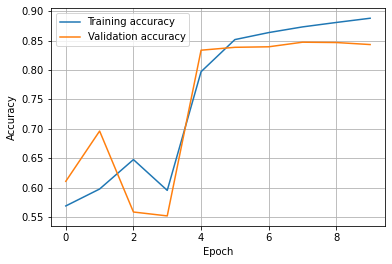

In [28]:
plt.plot(hist_ex3.history['loss'], label='Training loss')
plt.plot(hist_ex3.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(hist_ex3.history['accuracy'], label='Training accuracy')
plt.plot(hist_ex3.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()